In [1]:
# -----------------------
# 1. Setup
# -----------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
customer_profiles = pd.read_csv("../data/customer_profiles.csv")
transactions = pd.read_csv("../data/clean_transactions.csv")
loans = pd.read_csv("../data/clean_loans.csv")
credit_cards = pd.read_csv("../data/clean_credit_cards.csv")


In [2]:
# Use loan status as target (Approved/Rejected)
loan_df = loans.copy()
loan_df = loan_df[loan_df['status'].isin(['Approved', 'Rejected'])]

# Encode target
le = LabelEncoder()
loan_df['status_enc'] = le.fit_transform(loan_df['status'])  # Approved=0, Rejected=1

# Features
X = loan_df[['amount', 'interest_rate']]  # add more features if available
y = loan_df['status_enc']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



C:\Users\User\AppData\Local\Temp\ipykernel_10604\3561741819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df.fillna(0, inplace=True)
c:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_10604\3561741819.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['cluster'] =

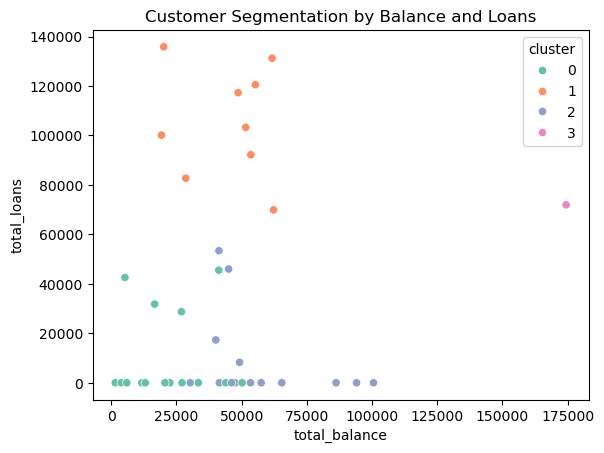

In [3]:
# Features for clustering
cluster_df = customer_profiles[['total_balance','total_loans','credit_card_balance']]
cluster_df.fillna(0, inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_df)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
sns.scatterplot(x='total_balance', y='total_loans', hue='cluster', data=cluster_df, palette='Set2')
plt.title("Customer Segmentation by Balance and Loans")
plt.show()


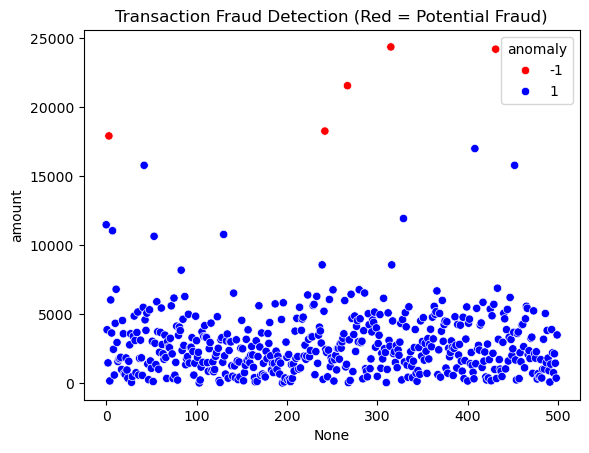

In [4]:
# Use Isolation Forest
txn_df = transactions[['amount']].copy()
iso = IsolationForest(contamination=0.01, random_state=42)
txn_df['anomaly'] = iso.fit_predict(txn_df)

# Visualize anomalies
sns.scatterplot(x=txn_df.index, y='amount', hue='anomaly', data=txn_df, palette={1:'blue', -1:'red'})
plt.title("Transaction Fraud Detection (Red = Potential Fraud)")
plt.show()
